<a href="https://colab.research.google.com/github/drwatson93/Solar-Plant-Analysis-Project/blob/main/What_can_we_learn_from_a_solar_plant's_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a solar power plant and how does it work?

<figure>
<center>
<img src='https://www.solarrelax.com/solarrelax/images/blog/ges-nedir-gunes-enerji-santrali-nedir.jpg' />
<figcaption>Solar Relax</figcaption></center>
</figure>

###In this notebook, we seek to understand the behavior of two solar power plants through the data generated by the photovoltaic modules and answer the following question: Can we identify faulty or sub optimally performing inverter with the data provided?

To do so, we dive into the following topics:
1.    Reminder on photovoltaic systems or PV systems
2.    EDA on:
 *    DC and AC power
 *    Irradiation
 *    ambient and module temperature
 *    yield
3.    Answer our question with the data gathered.

---




  A solar power plant is any type of facility that converts sunlight either directly, like Photovoltaics, or indirectly, like Solar Thermal plants, into electricity. For this notebook we are going to be focusing on solar plant which uses a Photovoltaics process of generating electricity.

  Photovoltaic power plants use large areas of photovoltaic cells, known as PV or solar cells, to directly convert sunlight into usable electricity. These cells are usually made from silicon alloys and are the technology most people have become familiar with - chances are you may have one on your roof.

  Solar cells generate Direct Current Energy (DC Power) which gets electrically feed to inverters. A solar inverter, or PV inverter, converts the variable direct current (DC) output of a photovoltaic (PV)solar panel into a usable form of alternating current (AC) that can used by a local off-grid electrical network. or can be fed into a commercial electrical grid.  AC is the standard used by all electric appliances in the home.

Source:

[Solar explainaed](https://www.eia.gov) 

[Photovoltaic(PV) Tutorial](http://web.mit.edu/taalebi/www/scitech/pvtutorial.pdf)

[PV Inverter](https://www.futuregenerationenergy.ie/domestic/solar-pv-inverters/)

[PV Systems](https://en.wikipedia.org/wiki/Photovoltaic_system)

<figure>
<center>
<img src='https://enerpojournaltest.files.wordpress.com/2017/07/gulnoza2.png?w=640' />
<figcaption>ENERPO journal</figcaption></center>
</figure>

# Descriptive analytics
these are some of the questions we need to solve before tackling our main challenge.
*   What is the mean value of daily yield?
*   What is the total irradiation per day?
*   What is the max ambient and module temperature?
*   How many inverters are there for each plant?
*   What is the maximum/minimum amount of DC/AC Power generated in a time   interval/day?
*   Which inverter (source_key) has produced maximum DC/AC power?
*   Rank the inverters based on the DC/AC power they produce
*   Is there any missing data?

###Lets Begin!

In [2]:
# Libraries to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import warnings
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

#Data Extraction and Load
Lets load the data for each of the plants generated power and their weather sensors.

In [4]:
#loading data from google drive storage.
plant1_generation = pd.read_csv('/content/drive/MyDrive/general/Plant_1_Generation_Data.csv')
plant1_weather = pd.read_csv('/content/drive/MyDrive/general/Plant_1_Weather_Sensor_Data.csv')
plant2_generation = pd.read_csv('/content/drive/MyDrive/general/Plant_2_Generation_Data.csv')
plant2_weather = pd.read_csv("/content/drive/MyDrive/general/Plant_2_Weather_Sensor_Data.csv")

#loading data from google drive link.
#plant1_generation = pd.read_csv('https://raw.githubusercontent.com/drwatson93/Data_science/master/Plant_1_Generation_Data.csv')
#plant1_weather = pd.read_csv('https://raw.githubusercontent.com/drwatson93/Data_science/master/Plant_1_Weather_Sensor_Data.csv')
#plant2_generation = pd.read_csv('https://raw.githubusercontent.com/drwatson93/Data_science/master/Plant_2_Generation_Data.csv')
#plant2_weather = pd.read_csv('https://raw.githubusercontent.com/drwatson93/Data_science/master/Plant_2_Weather_Sensor_Data.csv')

##Data Exploration:
Lets look at the first plant's data set.

In [5]:
#exploring the first 5 rows of the plant #1 energy generated data set.
plant1_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [6]:
#exploring the first 5 rows of the plant #2 energy generated data set.
plant2_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [7]:
#exploring the first 5 rows of the plant #1 weather data set.
plant1_weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [8]:
# Exploring the first 5 rows of the plant #2 weather data set.
plant2_weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [9]:
# Checking for missing values in plant #1
plant1_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [10]:
# Checking for missing values in plant #2
plant2_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


##Data Cleaning & Transformation

In [11]:
# Counting the number of unique inverters in each plant.
print('The number of unique inverters for Plant #1 on {} is {}'.format('15-05-2020 23:00', plant1_generation[plant1_generation.DATE_TIME == '15-05-2020 23:00']['SOURCE_KEY'].nunique()))
print('The number of unique inverters for Plant #2 on {} is {}'.format('2020-06-17 23:45:00', plant2_generation[plant2_generation.DATE_TIME == '2020-06-17 23:45:00']['SOURCE_KEY'].nunique()))

The number of unique inverters for Plant #1 on 15-05-2020 23:00 is 22
The number of unique inverters for Plant #2 on 2020-06-17 23:45:00 is 22



From the information above, the plants contain 22 unique inverters.

We need to transform the data to maintain only columns that are relevant in answering our questions above. with that, we will remove the plant ID as each data is separated by its file name. We will be formatting date and time column for each of the files for easier manipulation.

In [12]:
# droping the PLANT_ID Column.
plant1_generation.drop('PLANT_ID',1,inplace=True)
plant1_weather.drop('PLANT_ID',1,inplace=True)
plant2_generation.drop('PLANT_ID',1,inplace=True)
plant2_weather.drop('PLANT_ID',1,inplace=True)

# Formating the DATE_TIME column for data manipulation.
plant1_generation['DATE_TIME']= pd.to_datetime(plant1_generation['DATE_TIME'],format='%d-%m-%Y %H:%M')
plant1_weather['DATE_TIME']= pd.to_datetime(plant1_weather['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
plant2_generation['DATE_TIME']= pd.to_datetime(plant2_generation['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
plant2_weather['DATE_TIME']= pd.to_datetime(plant2_weather['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

##Data Storage
Now we will group the data and store to a variable that will be use to answer the questions above.

In [13]:
# Storing plant #1 energy generated summed data set to new variable for later utilization.
df_plant1_generation = plant1_generation.groupby('DATE_TIME').sum().reset_index()
# Seperating and creating a TIME and DATE column out of the DATE_TIME column in the data set.
df_plant1_generation['TIME'] = df_plant1_generation['DATE_TIME'].dt.time
df_plant1_generation['DATE'] = df_plant1_generation['DATE_TIME'].dt.date

# Storing plant #2 energy generated summed data set to new variable for later utilization.
df_plant2_generation = plant2_generation.groupby('DATE_TIME').sum().reset_index()
# Seperating and creating a TIME and DATE column out of the DATE_TIME column in the data set.
df_plant2_generation['TIME'] = df_plant2_generation['DATE_TIME'].dt.time
df_plant2_generation['DATE'] = df_plant2_generation['DATE_TIME'].dt.date

# Storing plant #1 weather summed data set to new variable for later utilization.
df_plant1_weather = plant1_weather.groupby('DATE_TIME').sum().reset_index()
# Seperating and creating a TIME and DATE column out of the DATE_TIME column in the data set.
df_plant1_weather['TIME'] = df_plant1_weather['DATE_TIME'].dt.time
df_plant1_weather['DATE'] = df_plant1_weather['DATE_TIME'].dt.date

# Storing plant #2 weather summed data set to new variable for later utilization.
df_plant2_weather = plant2_weather.groupby('DATE_TIME').sum().reset_index()
# Seperating and creating a TIME and DATE column out of the DATE_TIME column in the data set.
df_plant2_weather['TIME'] = df_plant2_weather['DATE_TIME'].dt.time
df_plant2_weather['DATE'] = df_plant2_weather['DATE_TIME'].dt.date

#Exploratory Analysis
We now have the data in the proper format, lets begin data exploration and see what trend with can identify.


##DC and AC Power

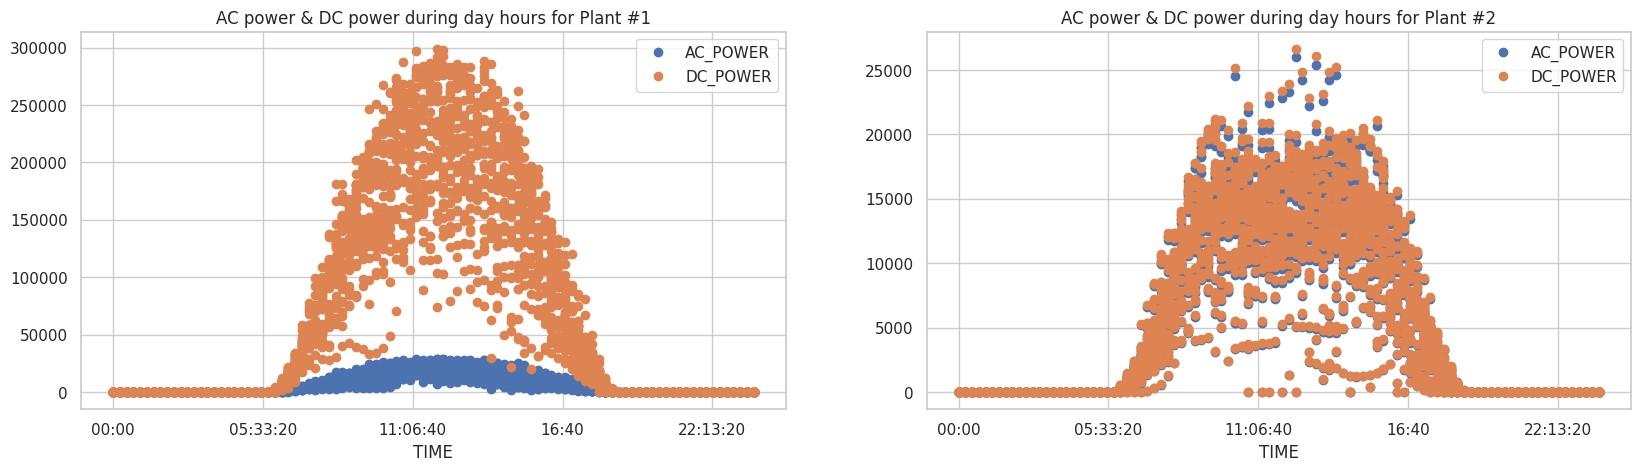

In [14]:
fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))

# AC & DC power plot
df_plant1_generation.set_index('TIME')[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[0])
df_plant2_generation.set_index('TIME')[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[1])
ax[0].set_title('AC power & DC power during day hours for Plant #1')
ax[1].set_title('AC power & DC power during day hours for Plant #2')
plt.show()

When exploring the visualisation I noticed a data error on the 'AC_POWER" generated when compared to plant #2. After further exploration i determined that there was a rounding error that cause significant lower values then expected. The data was corrected as we can observe below. We will need to further investigate with the source of the data to determine if this assumtion is accurate, but note that moving forward we will be working with the corrected data.

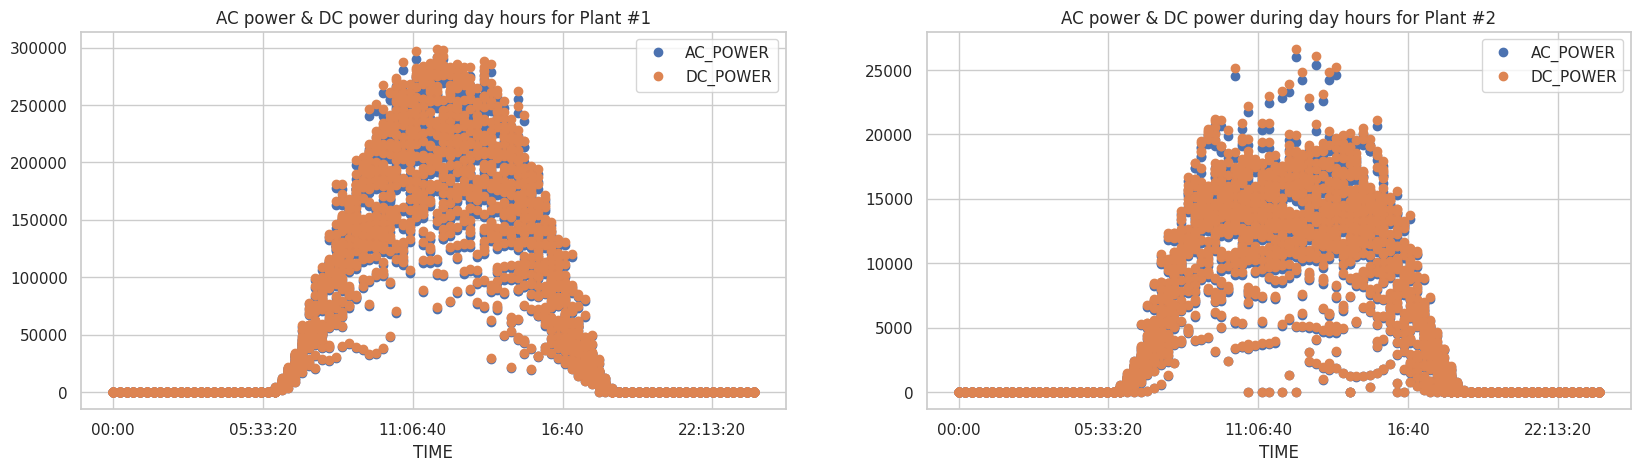

In [15]:
#AC & DC power plot after correcting data.
fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))
df_plant1_generation['AC_POWER'] = df_plant1_generation['AC_POWER']*10
df_plant1_generation.set_index('TIME')[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[0])
df_plant2_generation.set_index('TIME')[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[1])
ax[0].set_title('AC power & DC power during day hours for Plant #1')
ax[1].set_title('AC power & DC power during day hours for Plant #2')
plt.show()

##Daily Yield

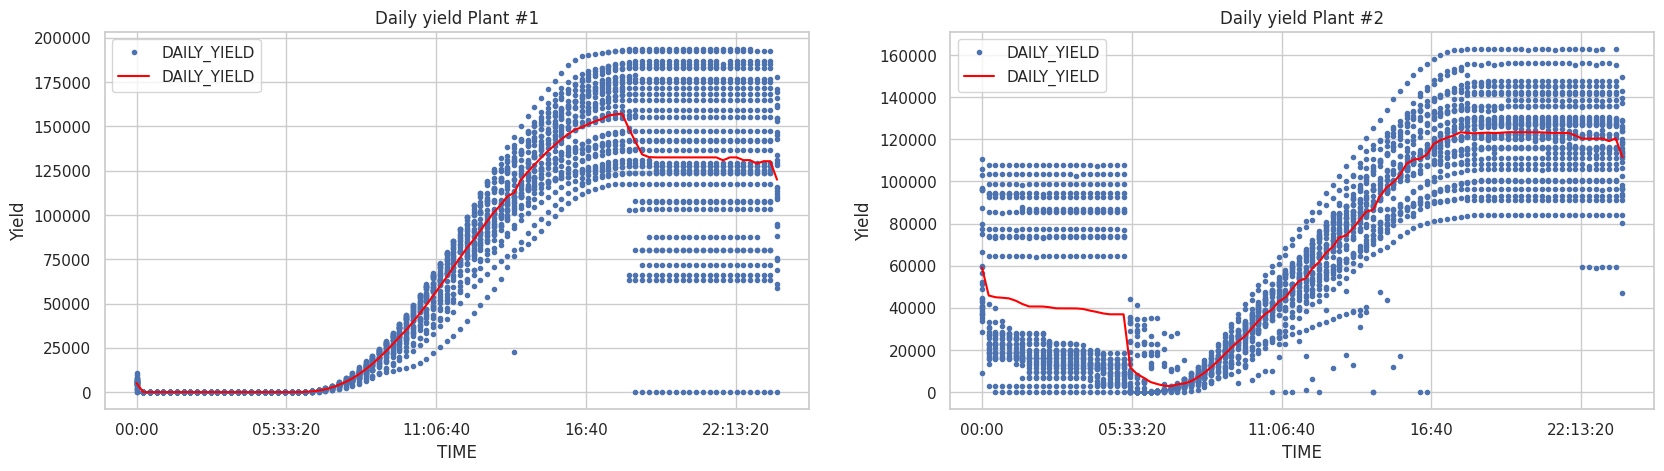

In [16]:
fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))

# daily yield plot plant #1
df_plant1_generation.plot(x='TIME', y='DAILY_YIELD', style='b.', ax=ax[0])
# Create a red color line to show the mean.
df_plant1_generation.groupby('TIME')['DAILY_YIELD'].agg('mean').plot(legend=True, color='red', ax=ax[0])
# daily yield plot plant #1
df_plant2_generation.plot(x='TIME', y='DAILY_YIELD', style='b.', ax=ax[1])
# Create a red color line to show the mean.
df_plant2_generation.groupby('TIME')['DAILY_YIELD'].agg('mean').plot(legend=True, color='red', ax=ax[1])

# Graph labels
ax[0].set_title('Daily yield Plant #1',)
ax[1].set_title('Daily yield Plant #2',)
ax[0].set_ylabel('Yield')
ax[1].set_ylabel('Yield')
plt.show()

##Ranking of inverters based on the DC/AC power they produce

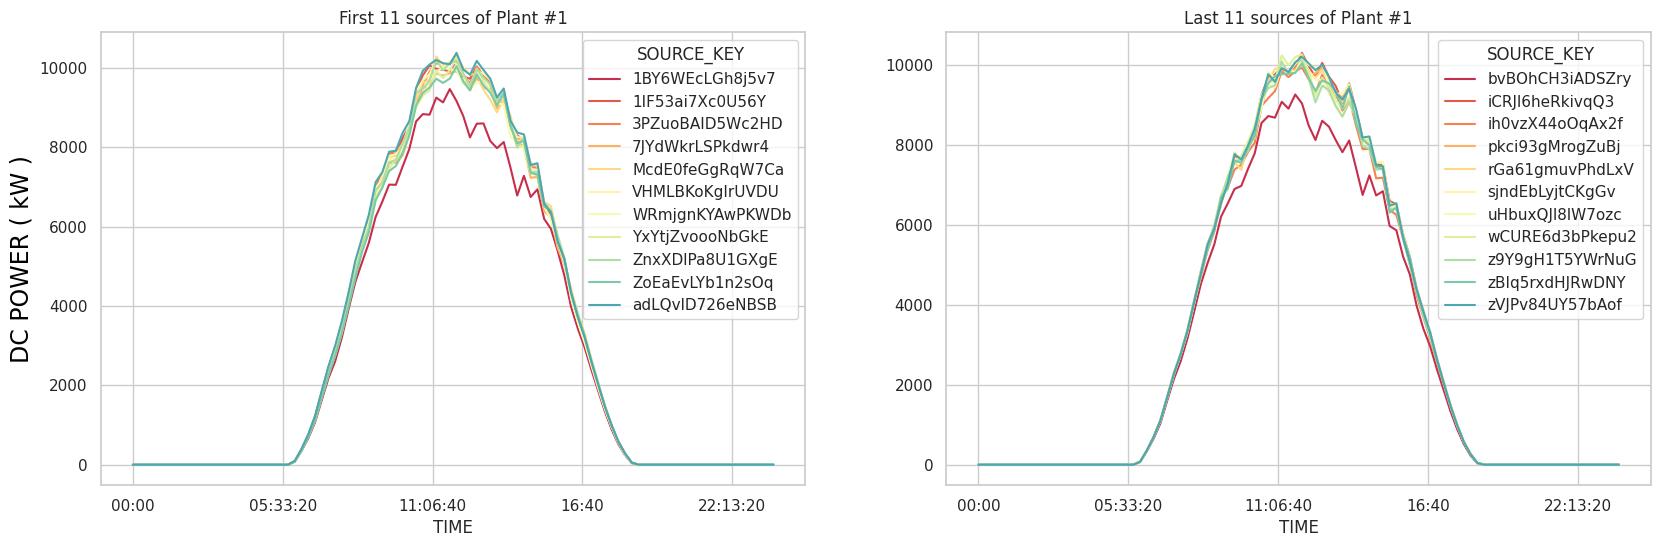

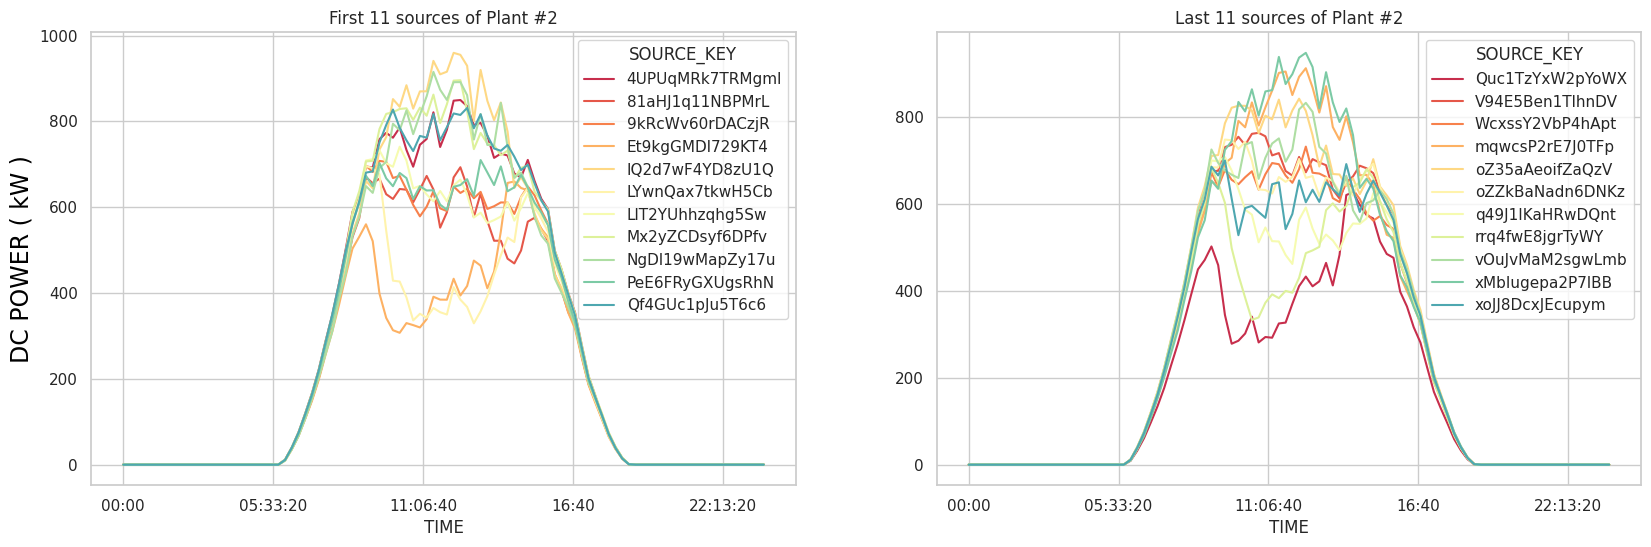

 Findings:
Here we can see, clearly, that 1BY6WEcLGh8j5v7 & bvBOhCH3iADSZry of Plant #1 are underperforming compared to other inverters, 
maybe these inverters require maintenance or require to be replaced. 



In [17]:
# We are creating a new df so we can continue to mutate the data with out affecting the main df.
inv_ranking_1 = plant1_generation.copy()
inv_ranking_1['TIME'] = inv_ranking_1['DATE_TIME'].dt.time
inv_ranking_1 = inv_ranking_1.groupby(['TIME','SOURCE_KEY'])['DC_POWER'].mean().unstack()
cmap = sns.color_palette("Spectral", n_colors=12)

# Creating a line plot of the first 11 and last 11 inverters from plant #1 so we can visually compare.
fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
inv_ranking_1.iloc[:,0:11].plot(ax=ax[0],color=cmap)
inv_ranking_1.iloc[:,11:22].plot(ax=ax[1],color=cmap)
# setting graph labels for Plant #1
ax[0].set_title('First 11 sources of Plant #1')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='black')
ax[1].set_title('Last 11 sources of Plant #1')
plt.show()

# We are creating a new df so we can continue to mutate the data with out affecting the main df.
inv_ranking_2 = plant2_generation.copy()
inv_ranking_2['TIME'] = inv_ranking_2['DATE_TIME'].dt.time
inv_ranking_2 = inv_ranking_2.groupby(['TIME','SOURCE_KEY'])['DC_POWER'].mean().unstack()
cmap = sns.color_palette("Spectral", n_colors=12)

# Creating a line plot of the first 11 and last 11 inverters from plant #2 so we can visually compare.
fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
inv_ranking_2.iloc[:,0:11].plot(ax=ax[0],color=cmap)
inv_ranking_2.iloc[:,11:22].plot(ax=ax[1],color=cmap)
# setting graph labels for plant #2
ax[0].set_title('First 11 sources of Plant #2')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='black')
ax[1].set_title('Last 11 sources of Plant #2')
plt.show()

#Findings
print(""" Findings:
Here we can see, clearly, that 1BY6WEcLGh8j5v7 & bvBOhCH3iADSZry of Plant #1 are underperforming compared to other inverters, 
maybe these inverters require maintenance or require to be replaced. 
""")


##Irradiation

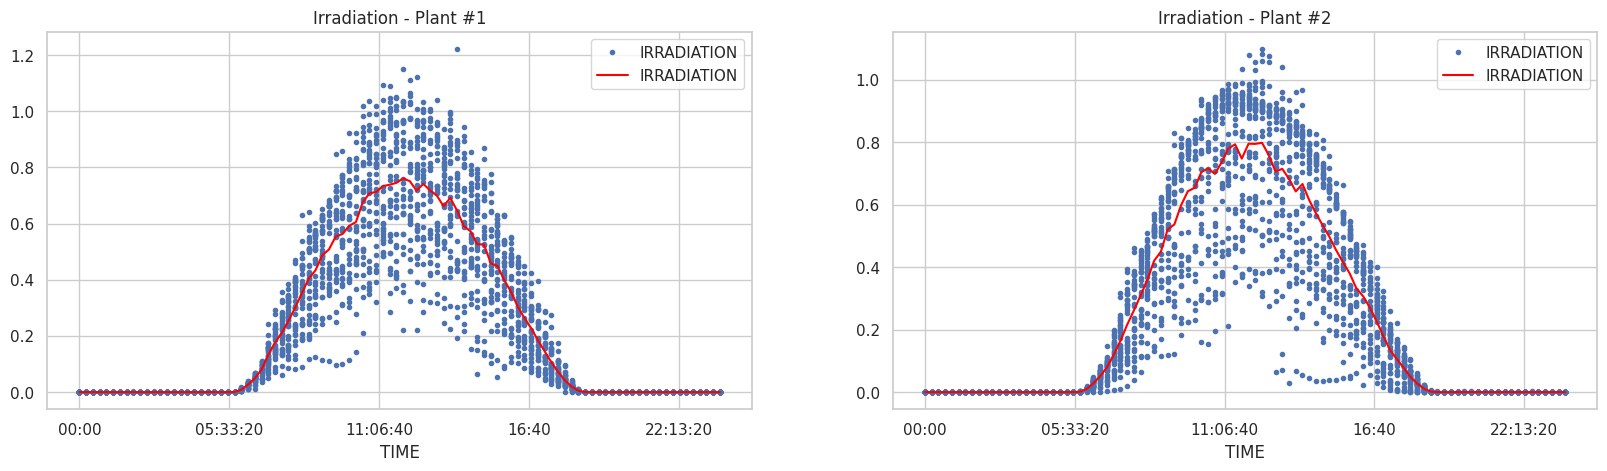

In [18]:
fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))

# Graph showing irradiation per plant.
# Solar irradiance is the rate at which radiant power is incident on a surface per unit area of surface.
df_plant1_weather.plot(x='TIME', y='IRRADIATION', style='b.', ax=ax[0])
df_plant1_weather.groupby('TIME')['IRRADIATION'].agg('mean').plot(legend=True, color='red', ax=ax[0])
df_plant2_weather.plot(x='TIME', y='IRRADIATION', style='b.', ax=ax[1])
df_plant2_weather.groupby('TIME')['IRRADIATION'].agg('mean').plot(legend=True, color='red', ax=ax[1])
# Graph labels.
ax[0].set_title('Irradiation - Plant #1',)
ax[1].set_title('Irradiation - Plant #2',)
plt.show()

##Ambient and module temperature



Text(0, 0.5, 'Temperature °C')

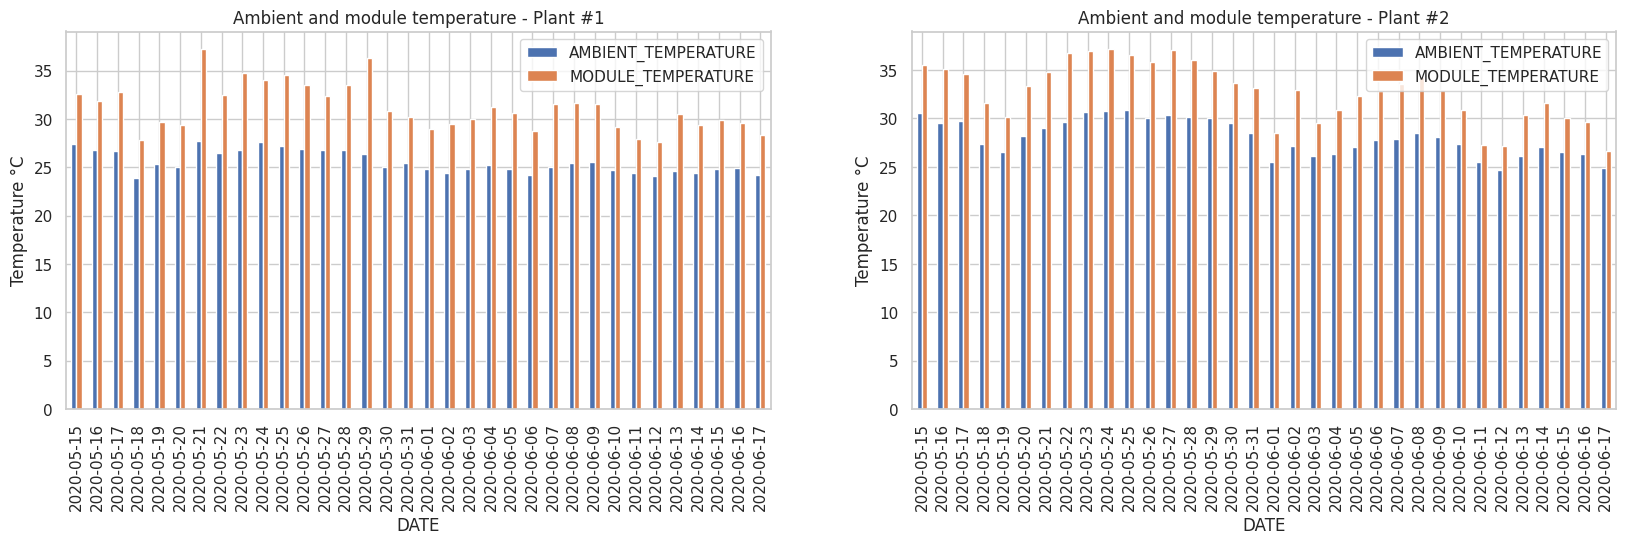

In [19]:
#max ambient and module temperature
fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))
df_plant1_weather.groupby('DATE')['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE'].agg('mean').plot(kind='bar', legend=True, ax=ax[0])
df_plant2_weather.groupby('DATE')['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE'].agg('mean').plot(kind='bar', legend=True, ax=ax[1])

# Graph labels.
ax[0].set_title('Ambient and module temperature - Plant #1',)
ax[0].set_ylabel('Temperature °C')
ax[1].set_title('Ambient and module temperature - Plant #2',)
ax[1].set_ylabel('Temperature °C')

#Task: Can we Identify Faulty equipment in need of replacement.
For the sake of simplyicty on this excersise we will keep all findings to plant #1. When this method is provent to work, then it can be replicated to the data in plant #2.

We identified above on the inverter ranking that inverters with ID# 1BY6WEcLGh8j5v7 & bvBOhCH3iADSZry of Plant #1 are underperforming compared to other inverters. 

Beofre we conclude that this inverters need to be replace, lets look at how the plant is performing on a day to day prospective. Lets take a deaper dive an see if we can confidently provide a conclusion.



## Real DC Power converted
As we can see below PLANT_1 it's able to convert about only 9-10 % of DC POWER produced by module: Inverters are inefficient!


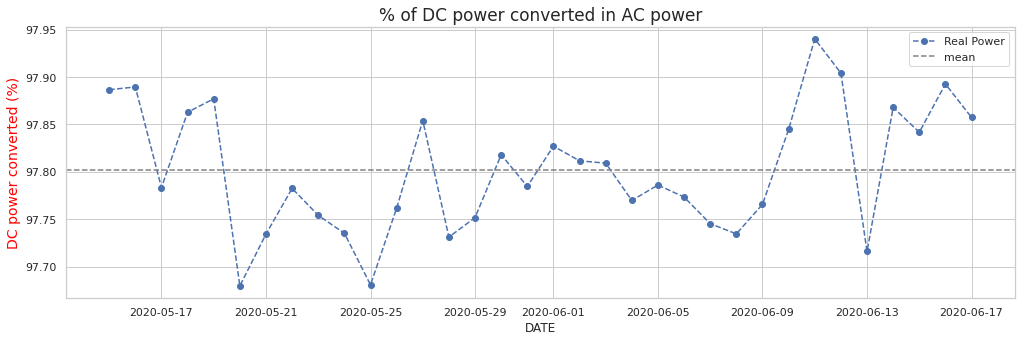

In [20]:
losses=df_plant1_generation.copy()
losses['DATE']=losses['DATE_TIME'].dt.date
losses=losses.groupby('DATE').sum()
losses['losses']=losses['AC_POWER']/losses['DC_POWER']*100

losses['losses'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='red')
plt.axhline(losses['losses'].mean(),linestyle='--',color='gray',label='mean')
plt.legend()
plt.show()

##DC POWER and DAILY YIELD in PLANT_1

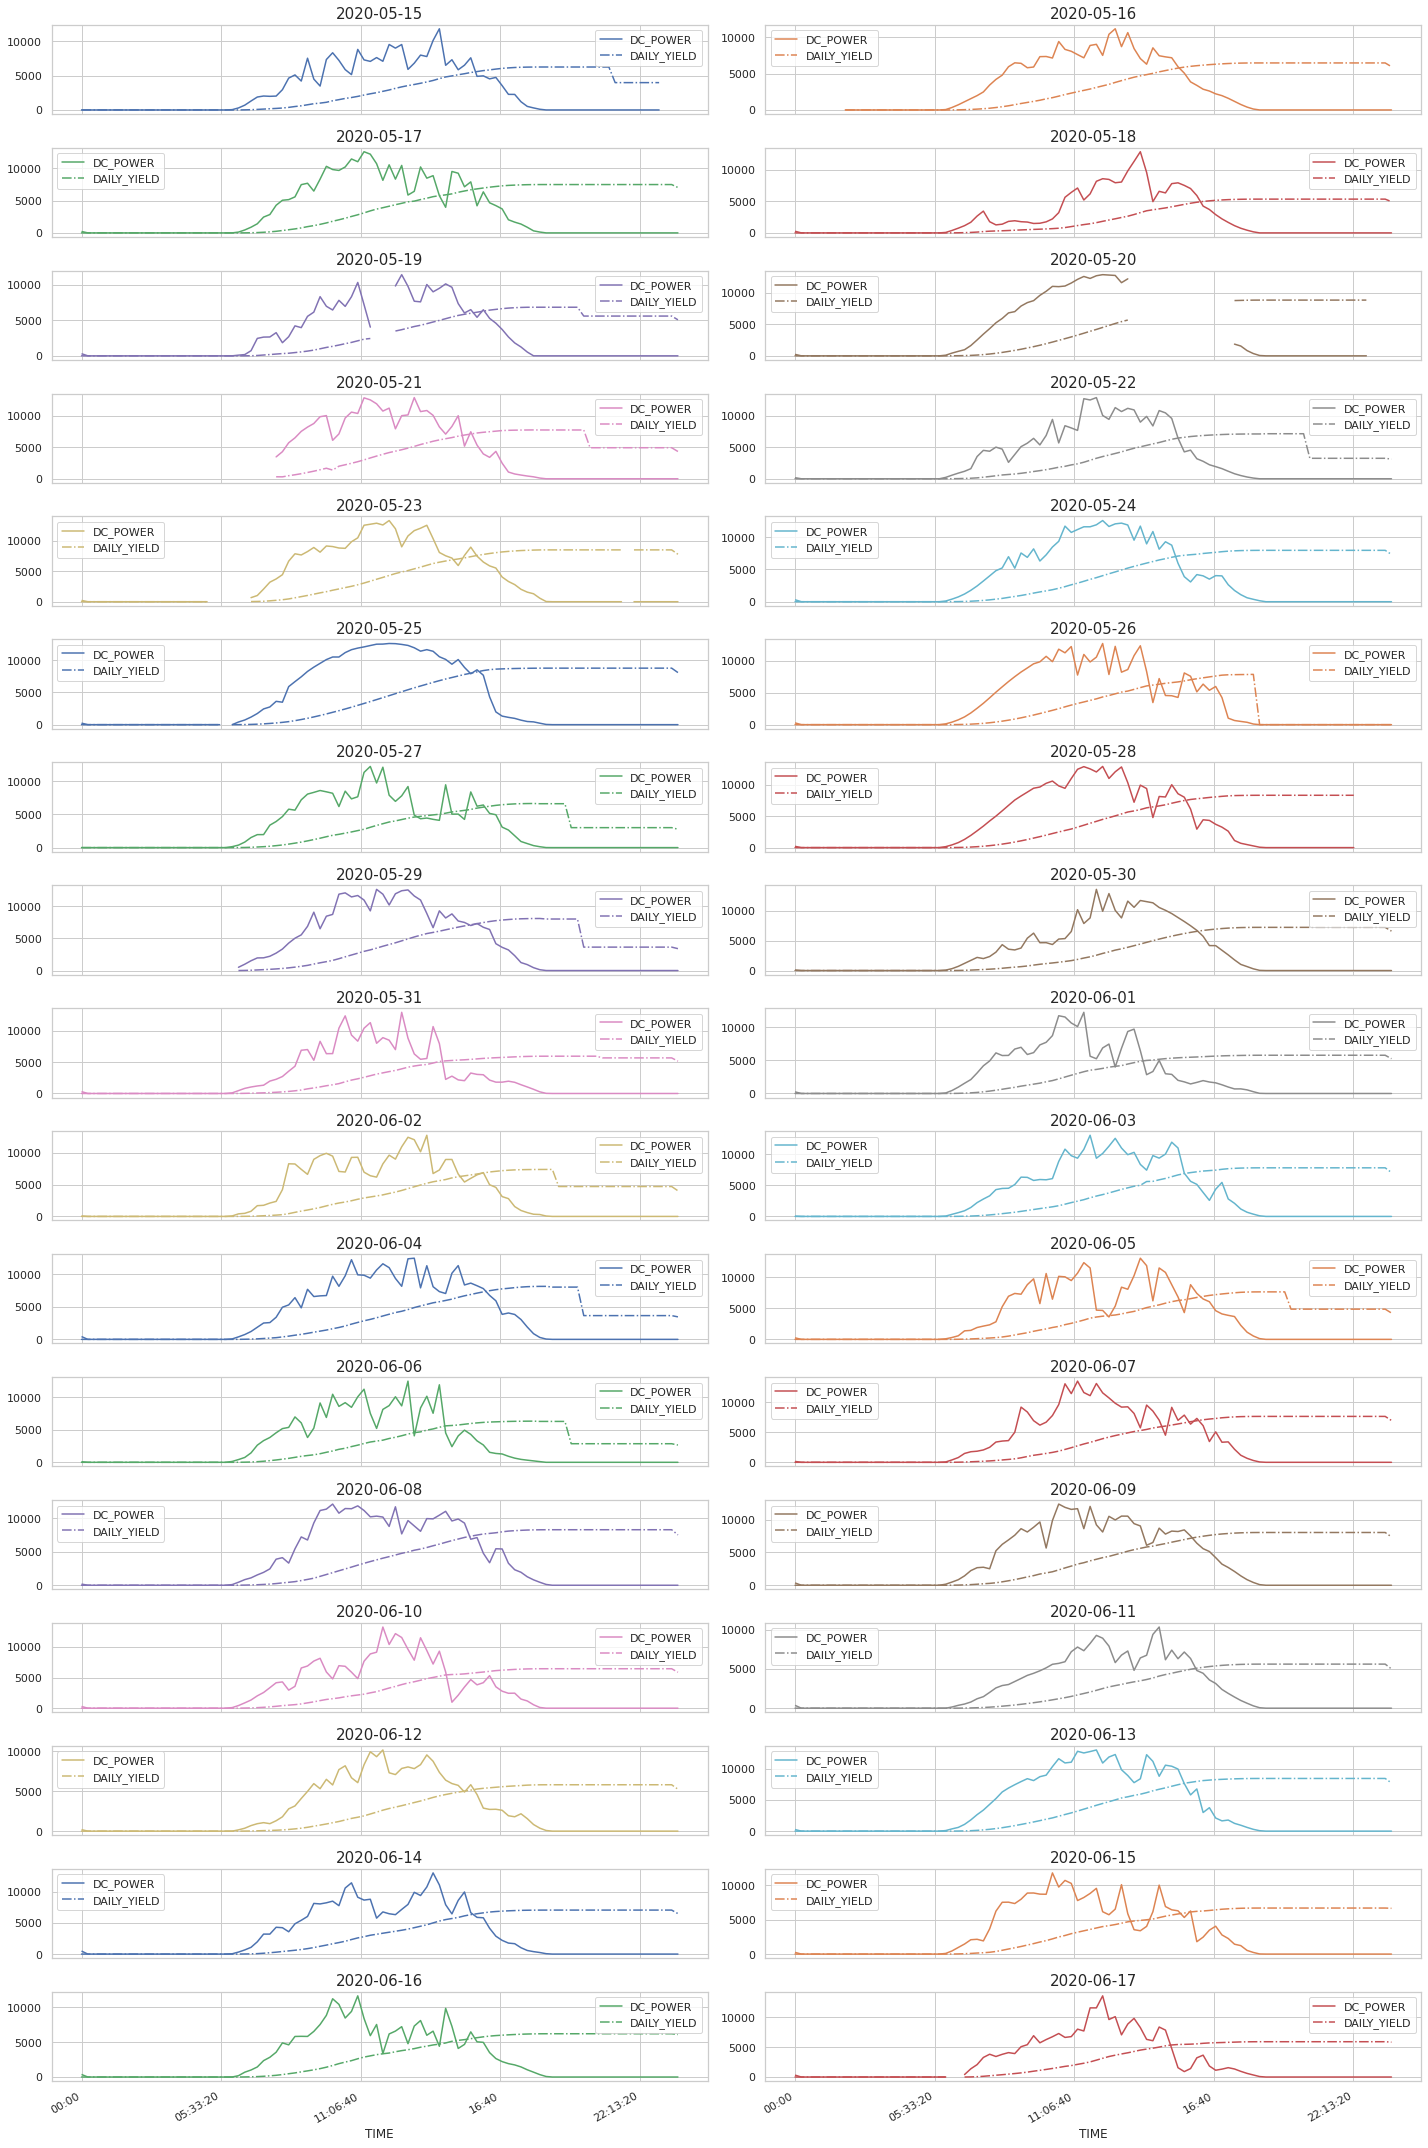


Findings:
As we can see from above there is time were several problems can be observed at the plant. 
Between 2020-05-19 and 2020-05-21 we can see a period which has null values that are common in daily yield and dc power generation. These null values may be due to technical issues at the plant. 
lets continue further!



In [21]:
# create a copy of the data so we can manipulate further with out corrupting the initial data.
deep_dive_df_gen_1=plant1_generation.copy()

# added a TIME and DATE column for the power generated using the exisitng DATE_TIME column
deep_dive_df_gen_1['TIME']=deep_dive_df_gen_1['DATE_TIME'].dt.time
deep_dive_df_gen_1['DATE']=deep_dive_df_gen_1['DATE_TIME'].dt.date

# create a copy of the data so we can manipulate further with out corrupting the initial data.
deep_dive_df_temp_1=plant1_weather.copy()

#added a TIME and DATE column for the weather using the exisitng DATE_TIME column
deep_dive_df_temp_1['TIME']=deep_dive_df_temp_1['DATE_TIME'].dt.time
deep_dive_df_temp_1['DATE']=deep_dive_df_temp_1['DATE_TIME'].dt.date

# create a df of index TIME and DATE with values derived from DC Power generated.
cols=deep_dive_df_gen_1.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack()

# create a plot of index TIME and DATE with values derived from DC Power generated. Finds the mean, unstacks to create a 1-dimensional array
ax = deep_dive_df_gen_1.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
# create a plot of index TIME and DATE with values derived from Daily_yield generated. Finds the mean, unstacks to create a 1-dimensional array
deep_dive_df_gen_1.groupby(['TIME','DATE'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

# Create a loop to plot each day data was collected at plant #1.
i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

print("""
Findings:
As we can see from above there is time were several problems can be observed at the plant. 
Between 2020-05-19 and 2020-05-21 we can see a period which has null values that are common in daily yield and dc power generation. These null values may be due to technical issues at the plant. 
lets continue further!
""")

##Module temperature and Ambient Temperature on PLANT_1

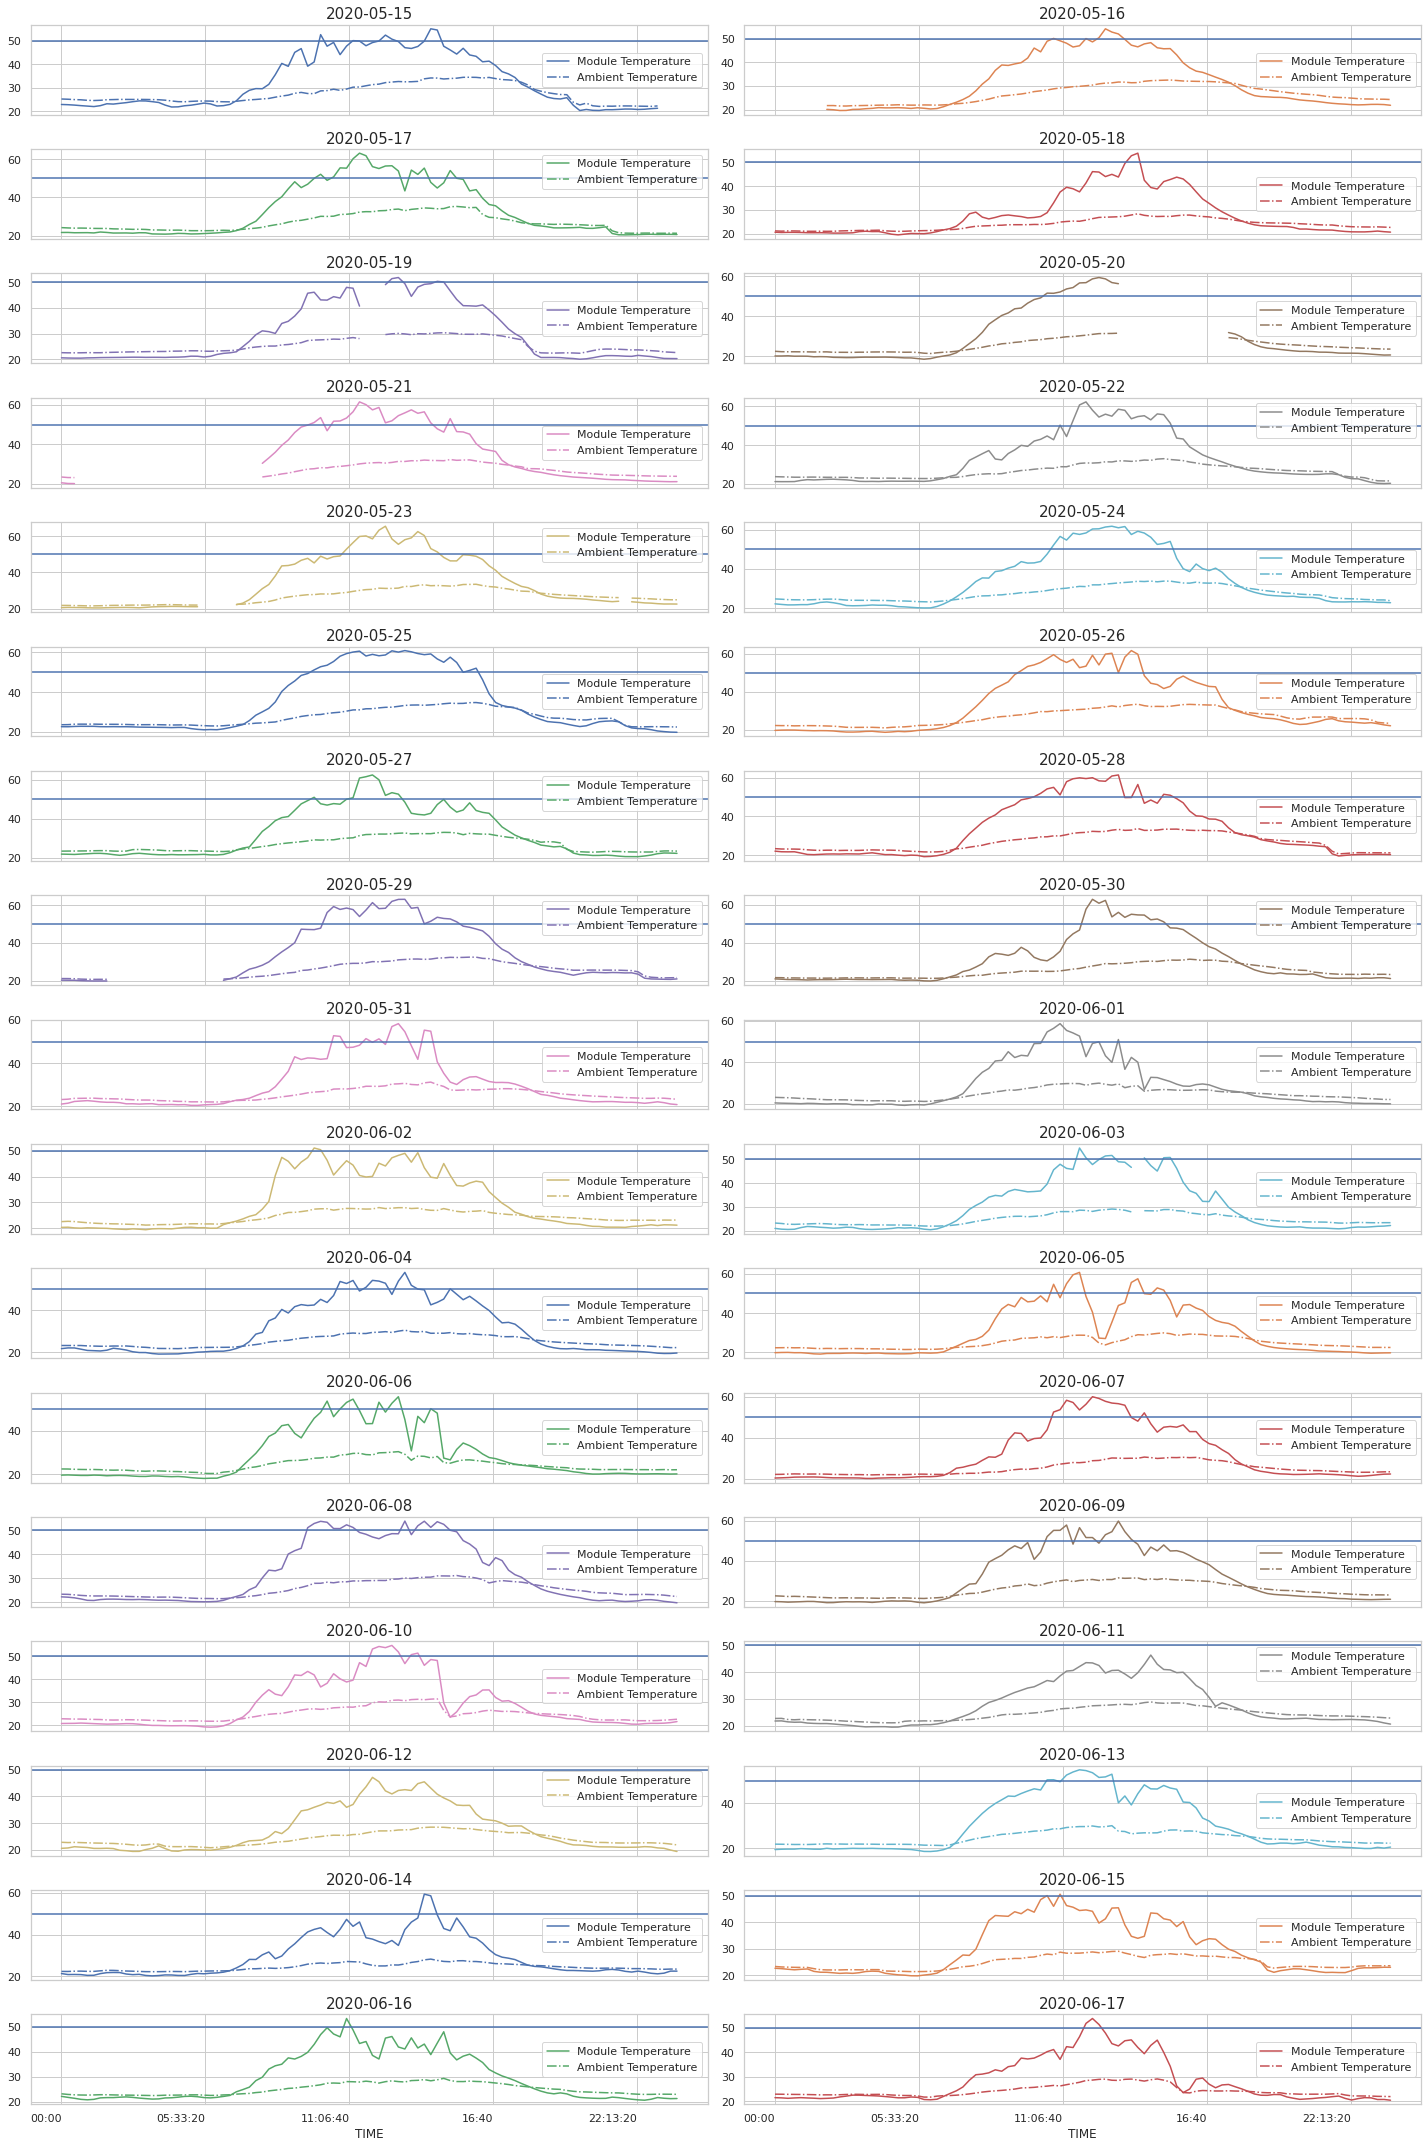


Finding:
Take a look at the same date we observed above having issues. Do you see anything odd? There is null values at the peak of energy generation. 
This means that the plant was not working at all for these time periods in the day. So we must suppose that there was a technical problem in the plant.
Notice that a decrease in ambient temperature,just for a couple of degrees, influence quite a lot module temperature.

P.S. I've drawn a line to see when module temperature goes over 50 degrees, this because a module overload may be the cause of a non-performing inverter.




In [22]:
# create a plot of index TIME and DATE with values derived from MODULE_TEMPERATURE. Finds the mean, unstacks to create a 1-dimensional array
ax = deep_dive_df_temp_1.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
# create a plot of index TIME and DATE with values derived from AMBIENT_TEMPERATURE. Finds the mean, unstacks to create a 1-dimensional array
deep_dive_df_temp_1.groupby(['TIME','DATE'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

# Create a loop to plot each day data was collected at plant #1.
i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
      # line at 50 C to signify a potential pv module overload.
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

print("""
Finding:
Take a look at the same date we observed above having issues. Do you see anything odd? There is null values at the peak of energy generation. 
This means that the plant was not working at all for these time periods in the day. So we must suppose that there was a technical problem in the plant.
Notice that a decrease in ambient temperature,just for a couple of degrees, influence quite a lot module temperature.

P.S. I've drawn a line to see when module temperature goes over 50 degrees, this because a module overload may be the cause of a non-performing inverter.

""")

##Inverter 1BY6WEcLGh8j5v7 in action

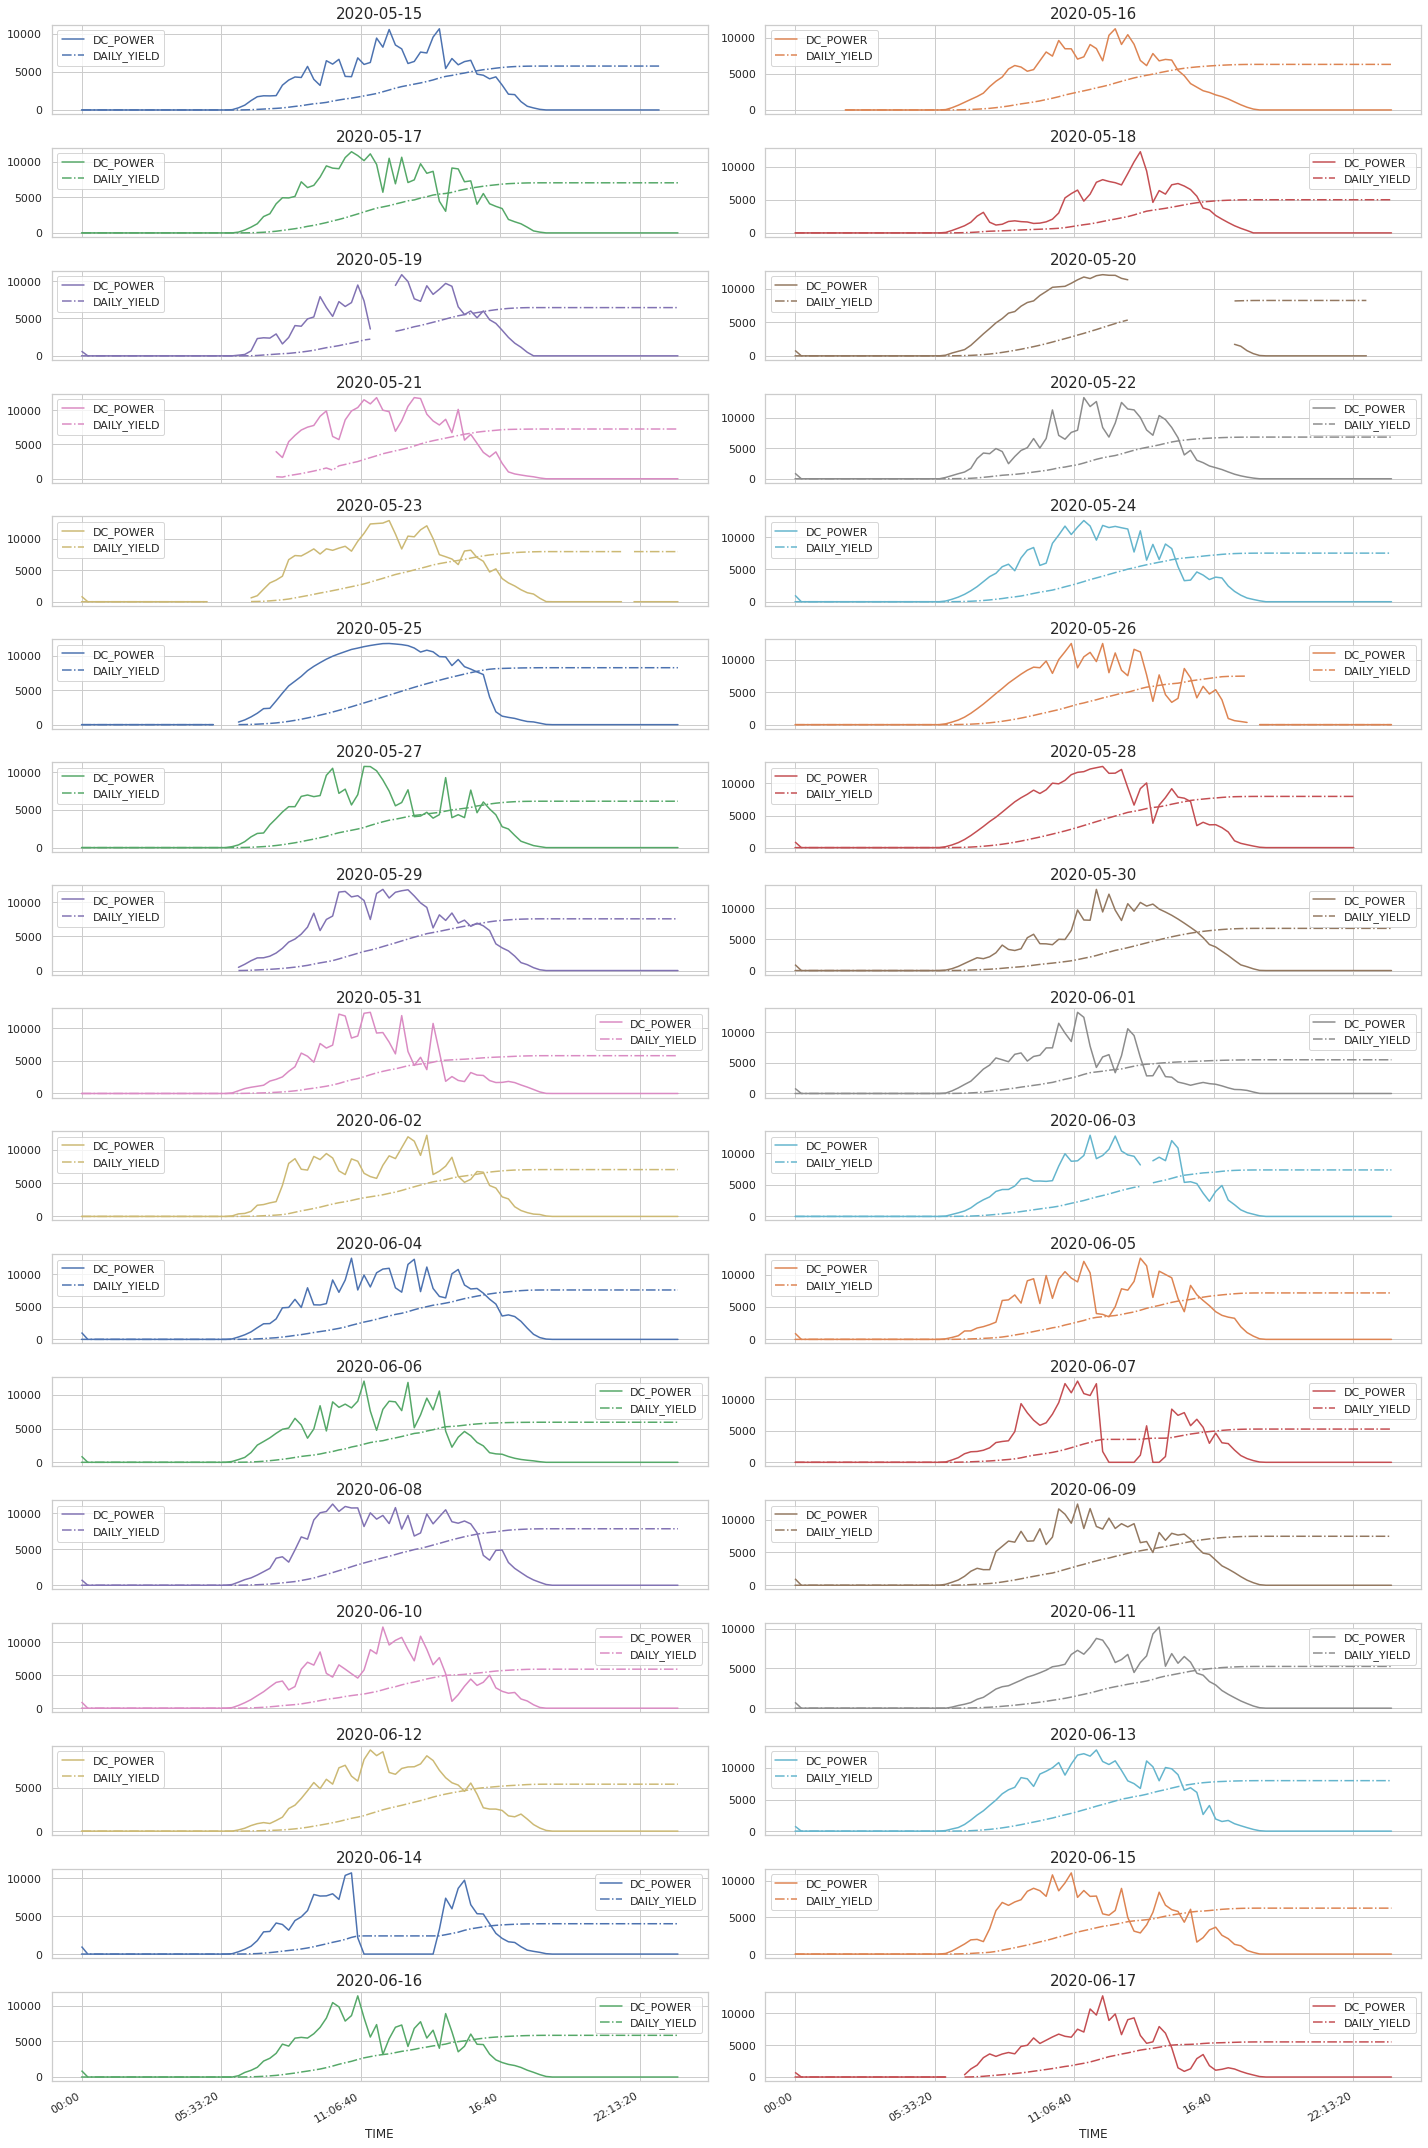


Finding:
Lets take a look at the following dates: June 7th and 14th, do you notice something odd? based on the data above can we determine this inverter is faulty? 
The inverter goes quickly to 0 exactly during maximum sunlight hours, between 11 am and 16 pm. 
This can only be due to a fault in the inverter, so maybe these inverters requires to be fixed or replaced.



In [23]:
# create a copy of the data so we can manipulate further with out corrupting the initial data.
worst_inv_plant_1 = plant1_generation[plant1_generation['SOURCE_KEY']=='1BY6WEcLGh8j5v7']

# added a TIME and DATE column for the power generated using the exisitng DATE_TIME column
worst_inv_plant_1['TIME'] = worst_inv_plant_1['DATE_TIME'].dt.time
worst_inv_plant_1['DATE'] = worst_inv_plant_1['DATE_TIME'].dt.date

ax=worst_inv_plant_1.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
worst_inv_plant_1.groupby(['TIME','DATE'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30),ax=ax,style='-.')

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

print("""
Finding:
Lets take a look at the following dates: June 7th and 14th, do you notice something odd? based on the data above can we determine this inverter is faulty? 
The inverter goes quickly to 0 exactly during maximum sunlight hours, between 11 am and 16 pm. 
This can only be due to a fault in the inverter, so maybe these inverters requires to be fixed or replaced.
""")

#Conclusion
#### After further investigating the data we have been able to identify faulty inverters with in the solar plant #1. 
We looked at the overall performance of the plant an identified that power plant #1 has black out periods were equipment maybe have potentially lost comunication to the data logger.

Example below:

<img src='https://raw.githubusercontent.com/drwatson93/Solar-Plant-Analysis-Project/main/ASSETS/Asset_1.PNG' />
<img src='https://raw.githubusercontent.com/drwatson93/Solar-Plant-Analysis-Project/main/ASSETS/Asset_4.PNG' />


---



We continued by narrowing down to the worst-performing inverter. Does inverters were identified with source key. 
Example below:
<img src='https://raw.githubusercontent.com/drwatson93/Solar-Plant-Analysis-Project/main/ASSETS/Asset_2.PNG' />


---



Then we expanded on the performance of the inverter throughout the data collection period to determine the dates the equipment could have faulted.
Examples below:

<img src='https://raw.githubusercontent.com/drwatson93/Solar-Plant-Analysis-Project/main/ASSETS/Asset_6.PNG' />
<img src='https://raw.githubusercontent.com/drwatson93/Solar-Plant-Analysis-Project/main/ASSETS/Asset_5.PNG' />


---


With our findings in place, we recommend that the Plant #1 operatiol team take the following actions:


*   Perform physical calibration of inverter 1BY6WEcLGh8j5v7.
*   Perform a manufacture recommended preventive mainteannce inspection.
*   Continue to monitor and record data from inverter 1BY6WEcLGh8j5v7 for the next 34 days.


 